# Artificial Intelligence exam project

Initial imports:

In [49]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import time
from utils import *

In [50]:
env = gym.make("MiniHack-Room-Monster-15x15-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render() 


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...............                                 
                                ...........@...                                 
                                F..........x...                                 
                                ...............                                 
                           

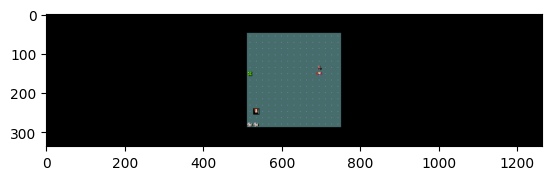

In [51]:
game_map = state['chars']
game = state['pixel']
plt.imshow(state['pixel'])

In [52]:
start = get_player_location(game_map)
end_target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", end_target)
print("Monster position:", get_monster_location(game_map))

Agent position: (8, 43)
Target position: (15, 33)
Monster position: [(17, 32), (17, 33), (9, 43), (9, 32)]


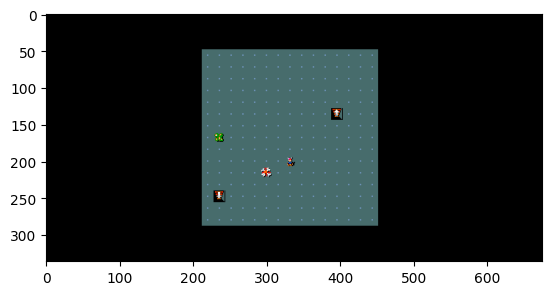

In [ ]:
player_moves = [start]
image = plt.imshow(game[:, 300:975])

#finchè non arriviamo alla soluzione
end_state=False
while not end_state:
    coord_monsters = get_monster_location(game_map)
    target = end_target
    if not len(coord_monsters)==0:
        target = coord_monsters[0]
    
    current_position=get_player_location(game_map)
    moves = get_valid_moves(game_map,current_position) #lista mosse valide
    coord=get_best_move(game_map, current_position, target, euclidean_distance)

    #stampa e aggiornamento passo
    game_map, _, end_state, _ = env.step(actions_from_path(current_position,[coord])[0])
    game_map=plot_map(game_map,image)
    player_moves.append(coord)

# lista passi effettuati
sol = actions_from_path(player_moves[0], player_moves[1:])
print(sol)


In [ ]:
3